Big amazon data:

        •https://www.kaggle.com/datasets/mkechinov/ecommerce-behavior-data-from-multi-category-store

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
data = pd.read_csv(r"C:\Users\ahask\Documents\DA8\Capstone\Capstone\Data\Percent Change in Consumer Spending, 2020-2022\amazon2019-Oct.csv")
print(data.head(1))

                event_time event_type  product_id   category_id category_code  \
0  2019-10-01 00:00:00 UTC       view    44600062  2.103810e+18           NaN   

      brand  price    user_id                          user_session  
0  shiseido  35.79  541312140  72d76fde-8bb3-4e00-8c23-a032dfed738c  


In [11]:
filtered_data = data[data['event_type'] != 'view']

# Drop unnecessary columns
filtered_data = filtered_data.drop(['product_id', 'category_id', 'user_id', 'user_session'], axis=1)

# Filter out null values
filtered_data = filtered_data.dropna()

# Save the filtered data to a new CSV file
filtered_data.to_csv('filtered_data.csv', index=False)





New Filtered dataframe because holy 1Million+ rows batman!

In [18]:
new_dataframe = pd.read_csv('filtered_data.csv')
new_dataframe.head()


,event_time,event_type,category_code,brand,price
0,2019-10-01 00:02:14 UTC,purchase,electronics.smartphone,samsung,130.76
1,2019-10-01 00:04:37 UTC,purchase,electronics.smartphone,apple,642.69
2,2019-10-01 00:07:07 UTC,purchase,furniture.bathroom.toilet,santeri,54.42
3,2019-10-01 00:09:26 UTC,purchase,electronics.audio.headphone,apple,189.91
4,2019-10-01 00:09:33 UTC,cart,electronics.smartphone,apple,515.67


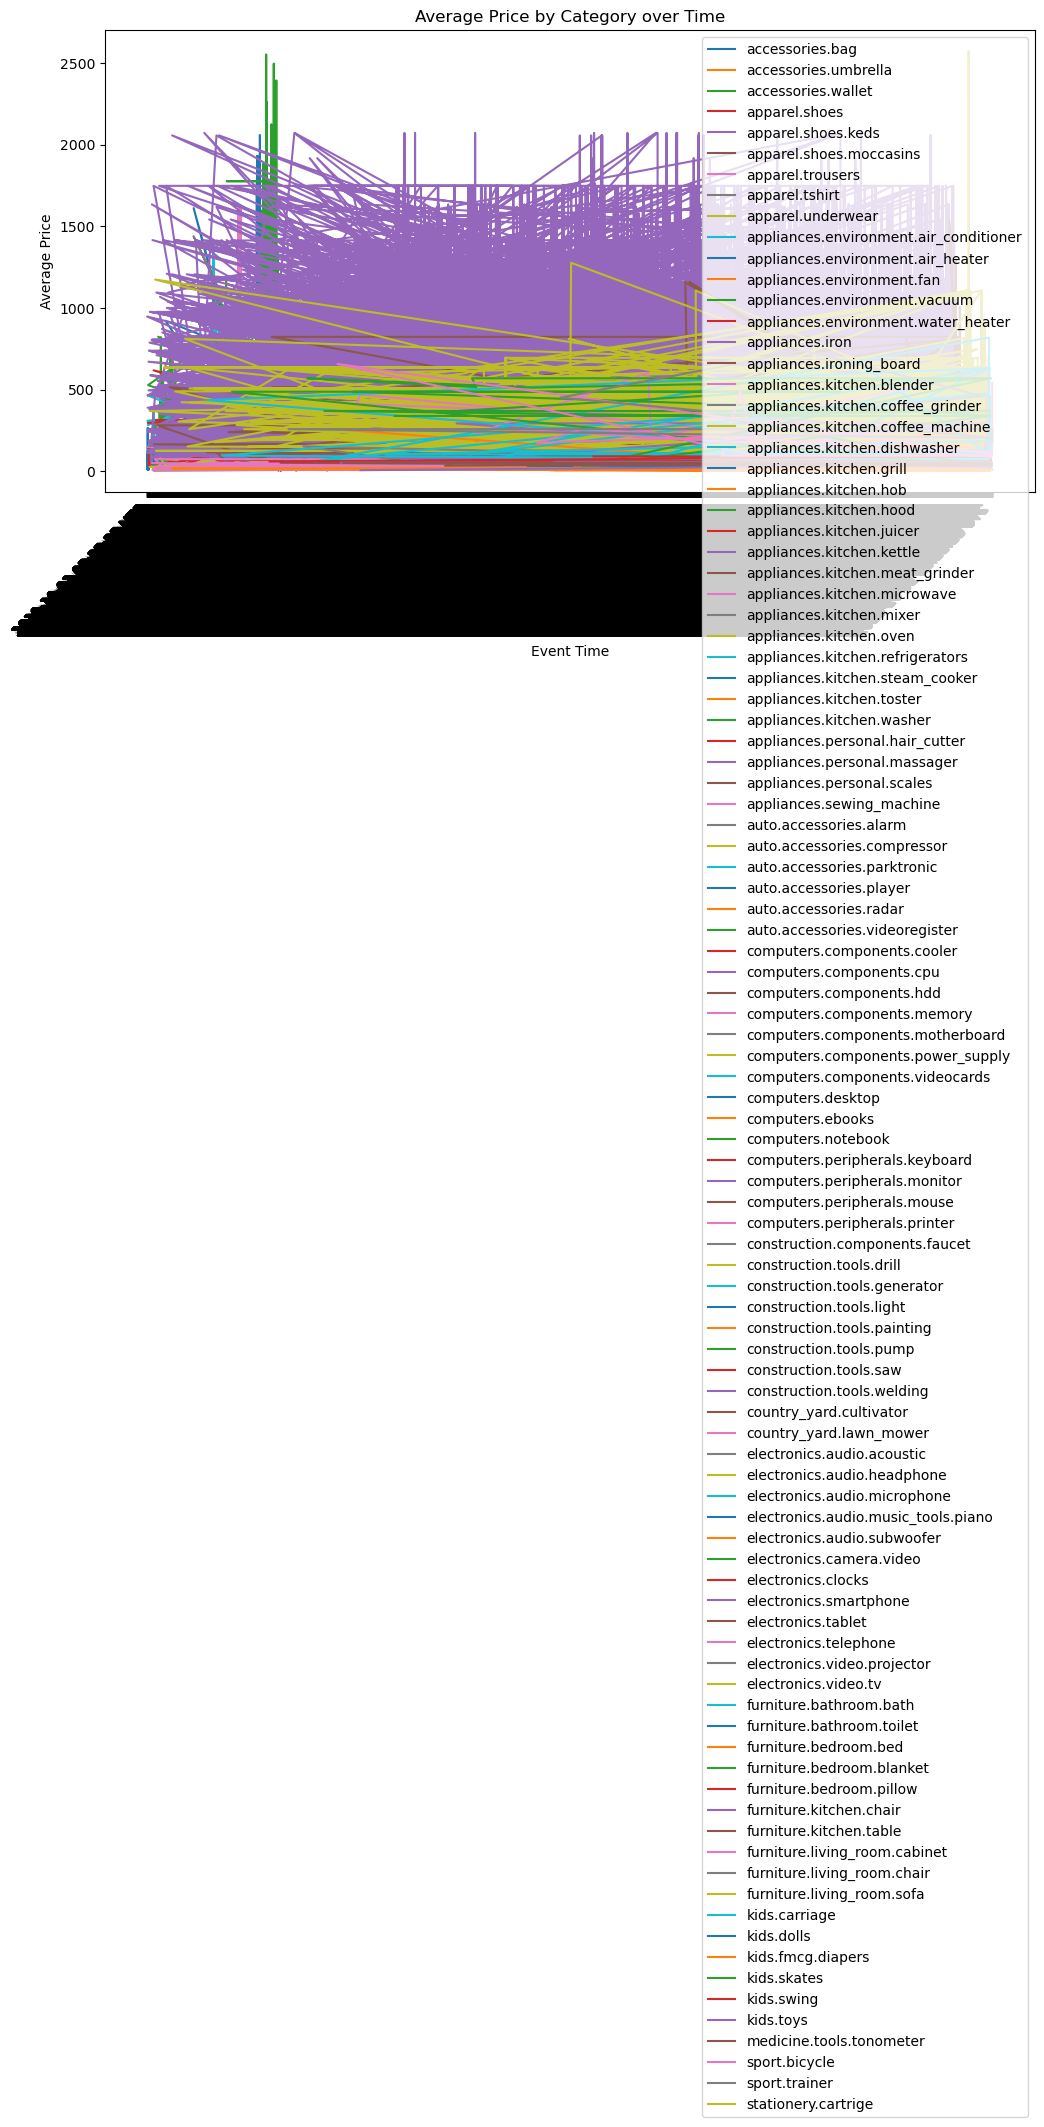

In [13]:
average_price_data = new_dataframe.groupby(['category_code', 'event_time'])['price'].mean().reset_index()

plt.figure(figsize=(12, 6))
for category_code in average_price_data['category_code'].unique():
    category_data = average_price_data[average_price_data['category_code'] == category_code]
    plt.plot(category_data['event_time'], category_data['price'], label=category_code)

plt.xlabel('Event Time')
plt.ylabel('Average Price')
plt.title('Average Price by Category over Time')
plt.legend()

plt.xticks(rotation=45, ha='right')

plt.show()


c:\Users\ahask\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


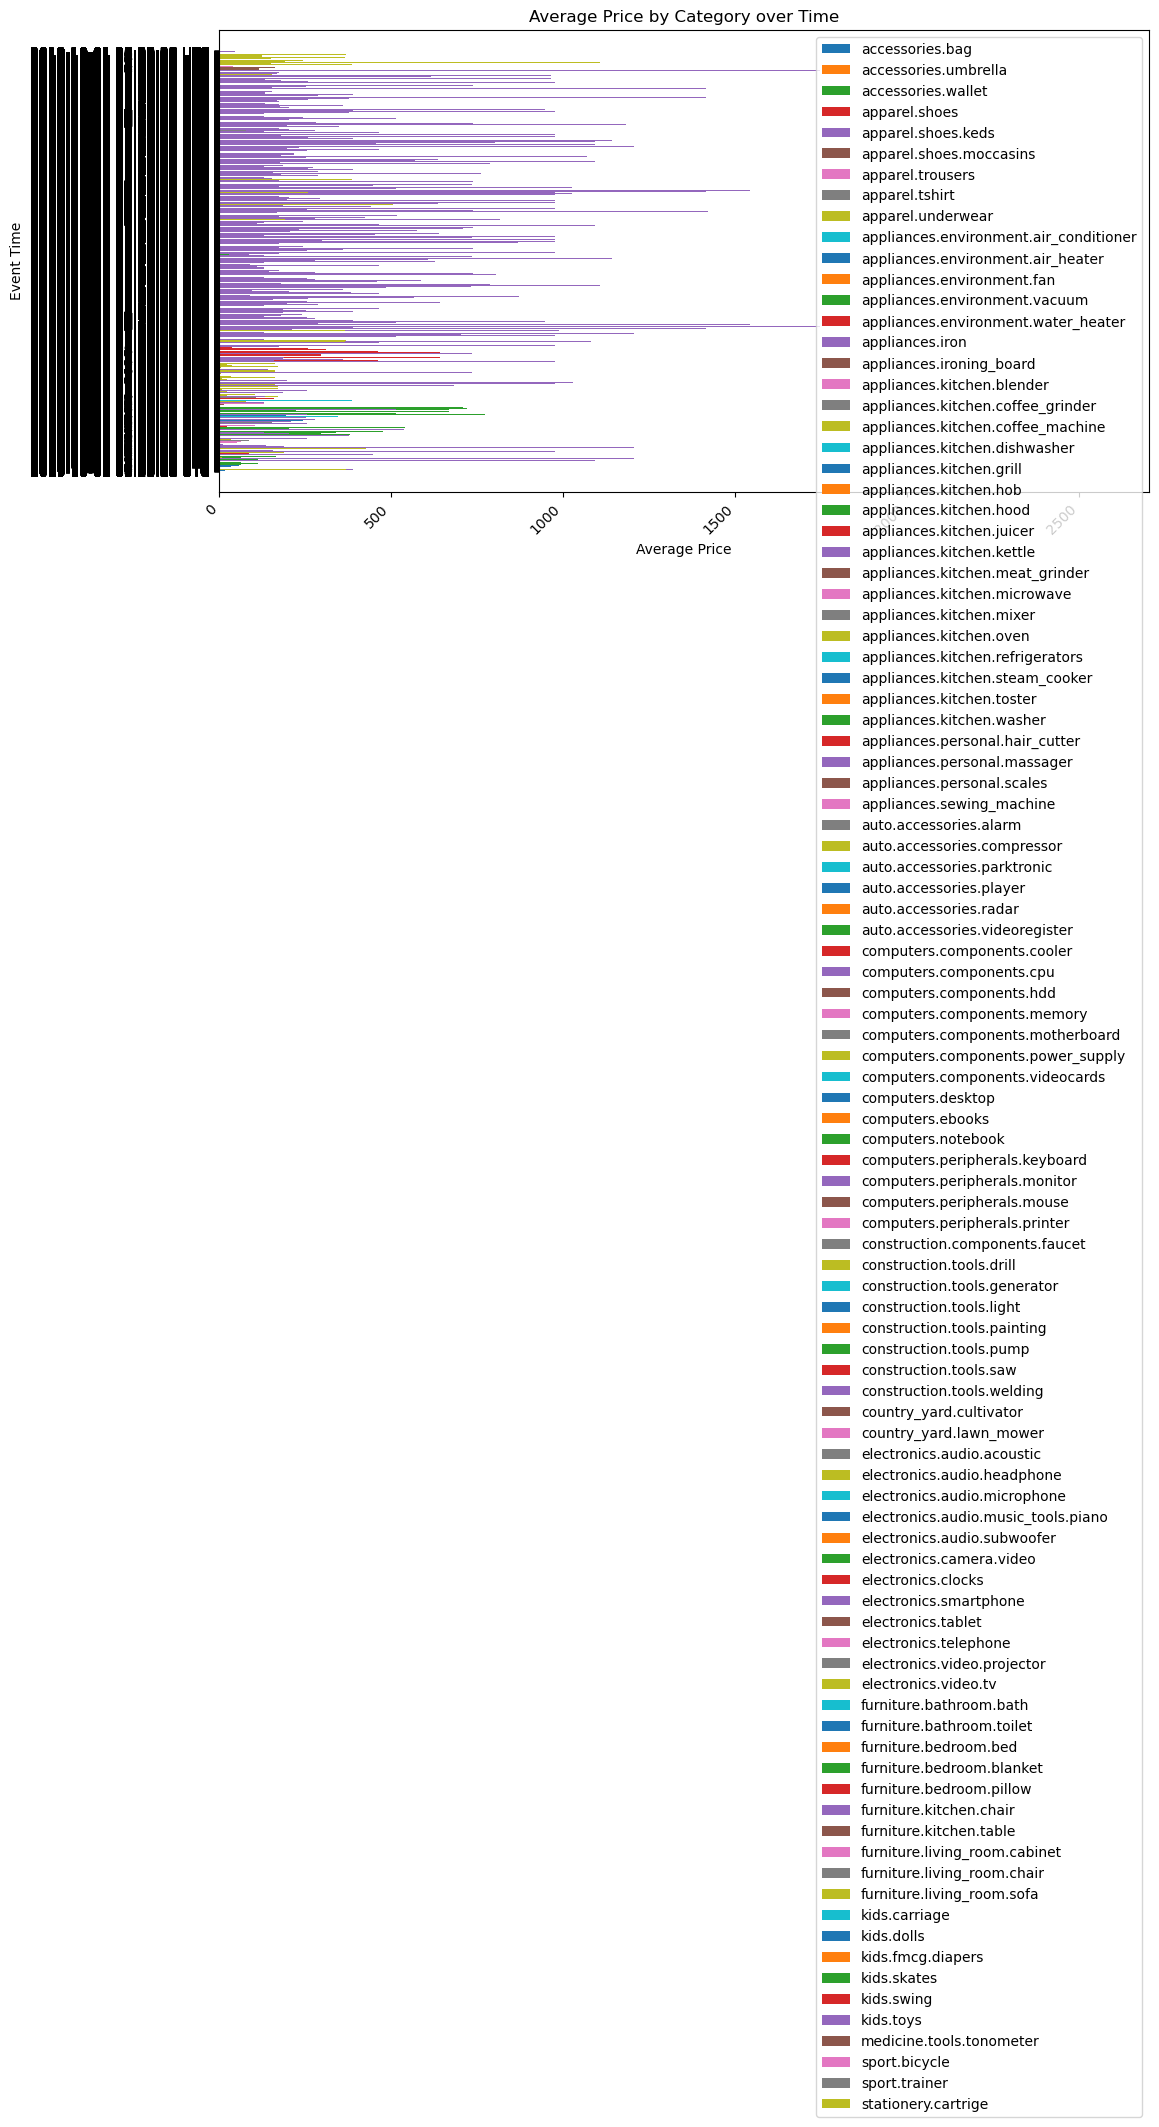

In [14]:
average_price_data = new_dataframe.groupby(['category_code', 'event_time'])['price'].mean().reset_index()

unique_categories = average_price_data['category_code'].unique()

plt.figure(figsize=(12, 6))
for i, category_code in enumerate(unique_categories):
    category_data = average_price_data[average_price_data['category_code'] == category_code]
    plt.barh(category_data['event_time'], category_data['price'], label=category_code)

plt.xlabel('Average Price')
plt.ylabel('Event Time')
plt.title('Average Price by Category over Time')
plt.legend()

plt.xticks(rotation=45, ha='right')

plt.show()


ecommerce excel file: